In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/yelp_dataset/Dataset_News.csv") 

In [ ]:
df

,Unnamed: 0,text,date,target
0,0,WASHINGTON (Reuters) - The head of a conservat...,"December 31, 2017",1
1,1,WASHINGTON (Reuters) - Transgender people will...,"December 29, 2017",1
2,2,WASHINGTON (Reuters) - The special counsel inv...,"December 31, 2017",1
3,3,WASHINGTON (Reuters) - Trump campaign adviser ...,"December 30, 2017",1
4,4,SEATTLE/WASHINGTON (Reuters) - President Donal...,"December 29, 2017",1
...,...,...,...,...
44893,44893,21st Century Wire says As 21WIRE reported earl...,"January 16, 2016",0
44894,44894,21st Century Wire says It s a familiar theme. ...,"January 16, 2016",0
44895,44895,Patrick Henningsen 21st Century WireRemember ...,"January 15, 2016",0
44896,44896,21st Century Wire says Al Jazeera America will...,"January 14, 2016",0


Removing the date as it is not used for further analysis

In [ ]:
df.drop(["date"],axis=1,inplace=True)

Removing punctuation

In [ ]:
import string
def punctuation_removal(text):
    all_list = [char for char in text if char not in string.punctuation]
    clean_str = ''.join(all_list)
    return clean_str
df['text'] = df['text'].apply(punctuation_removal)

Removing the HTML tags and URLs from the reviews

In [ ]:
from bs4 import BeautifulSoup
df['text']=df['text'].apply(lambda x: BeautifulSoup(x).get_text())
import re
df['text'] = df['text'].apply(lambda x: re.sub(r"http\S+", "", x))

Remove stopwords

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')
df['text'] = df['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


**Word Cloud**

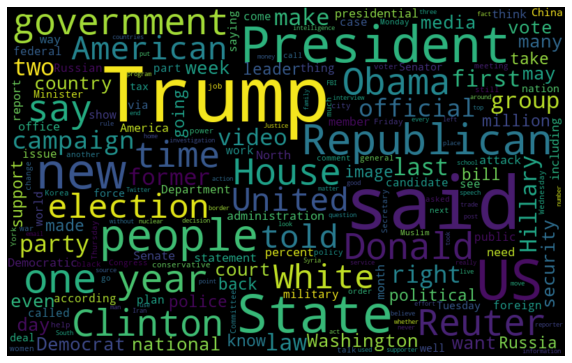

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
fake_data = df
all_words = ' '.join([text for text in fake_data.text])
wordcloud = WordCloud(width= 800, height= 500,
                          max_font_size = 110,
                          collocations = False).generate(all_words)
plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

**Function for most frequent words**

In [ ]:
# Most frequent words counter (Code adapted from https://www.kaggle.com/rodolfoluna/fake-news-detector)  
import seaborn as sns 
from nltk import tokenize
token_space = tokenize.WhitespaceTokenizer()
def counter(text, column_text, quantity):
    all_words = ' '.join([text for text in text[column_text]])
    token_phrase = token_space.tokenize(all_words)
    frequency = nltk.FreqDist(token_phrase)
    df_frequency = pd.DataFrame({"Word": list(frequency.keys()),
                                   "Frequency": list(frequency.values())})
    df_frequency = df_frequency.nlargest(columns = "Frequency", n = quantity)
    plt.figure(figsize=(12,8))
    ax = sns.barplot(data = df_frequency, x = "Word", y = "Frequency", color = 'blue')
    ax.set(ylabel = "Count")
    plt.xticks(rotation='vertical')
    plt.show()

**Finding most frequent words (20 words)**

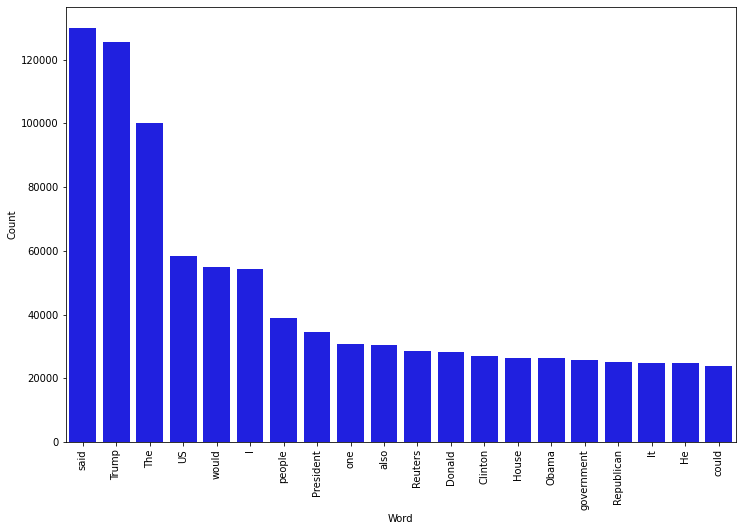

In [ ]:
counter(df, "text", 20)